In [1]:
import tensorflow as tf 
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
len(train_images), len(test_images)

(60000, 10000)

In [7]:
len(train_labels), len(test_labels)

(60000, 10000)

In [8]:
np.unique(train_labels), np.unique(test_labels)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [9]:
print(train_labels[0])

9


In [10]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

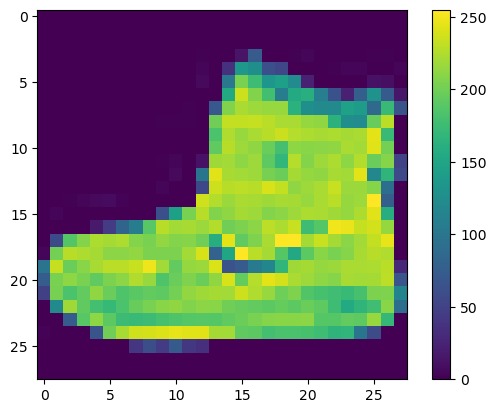

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images/255
test_images = test_images/255

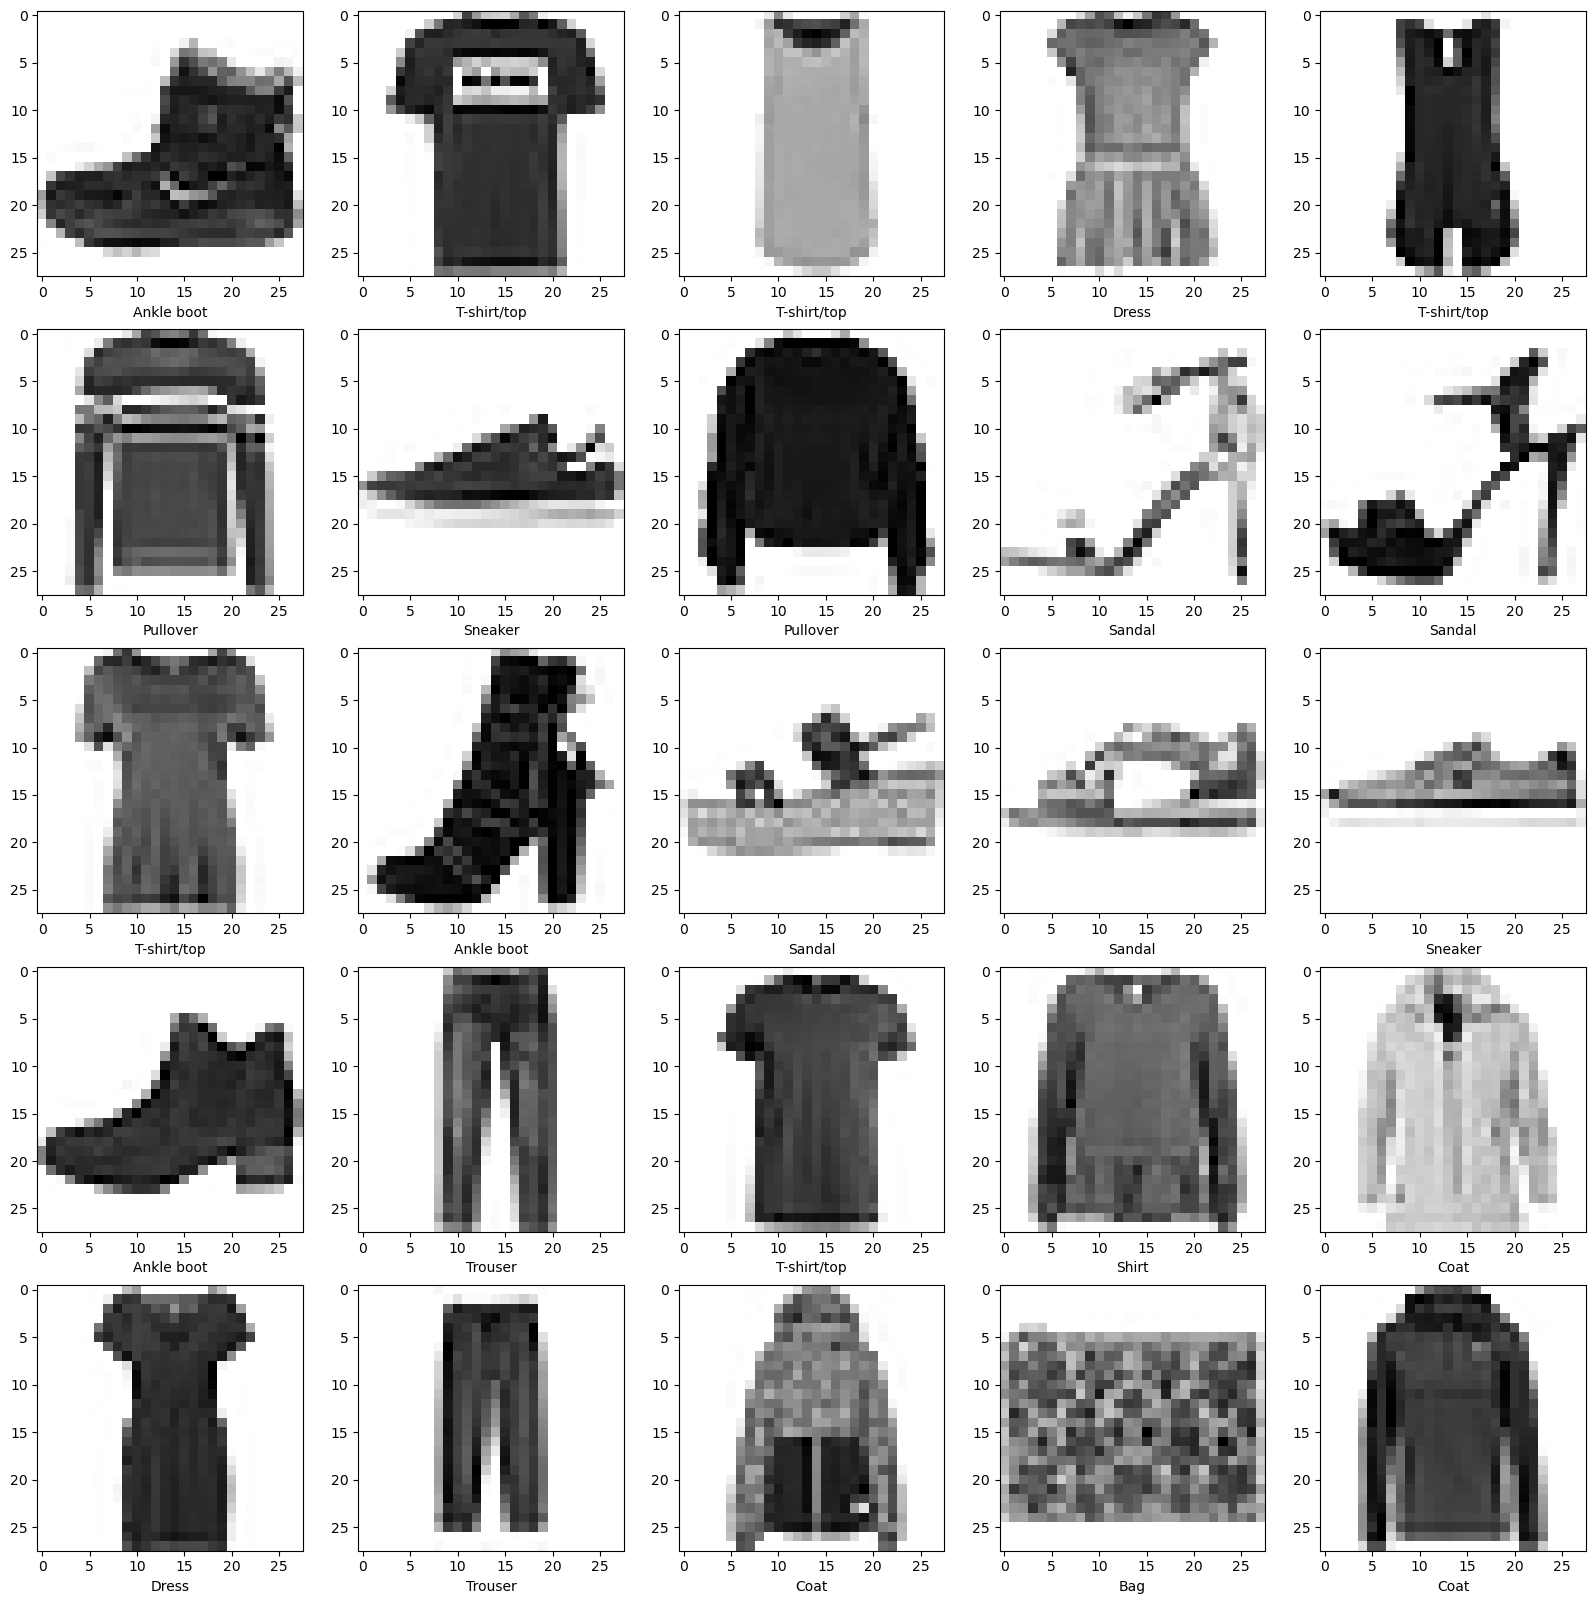

In [13]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape= (28,28)))
model.add(tf.keras.layers.Dense(130, activation = 'relu'))
model.add(tf.keras.layers.Dense(50, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 130)               102050    
                                                                 
 dense_1 (Dense)             (None, 50)                6550      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 109110 (426.21 KB)
Trainable params: 109110 (426.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy (from_logits= True), optimizer = 'adam', metrics = ['accuracy'])

In [17]:
#Will use if necessary for overfitting 
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.90):
            print('Reached target accuracy so stopping training')
            self.model.stop_training = True 

callback = myCallback()

In [18]:
model.fit(train_images, train_labels ,epochs = 10)

Epoch 1/10


C:\Users\brian\AppData\Roaming\Python\Python39\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 18s 8ms/step - loss: 0.5014 - accuracy: 0.8224
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3720 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3345 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3129 - accuracy: 0.8834
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2948 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2805 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2667 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2570 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2487 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2404

In [19]:
model_loss, model_accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print(f"Model Loss: {model_loss}, Model Accuracy: {model_accuracy}")

313/313 - 1s - loss: 0.3588 - accuracy: 0.8780 - 932ms/epoch - 3ms/step
Model Loss: 0.35883843898773193, Model Accuracy: 0.878000020980835


In [20]:
prediction_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = prediction_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [21]:
predictions[1]

array([0.1309139 , 0.06693728, 0.18195291, 0.06693775, 0.18110424,
       0.07024015, 0.10109977, 0.06693732, 0.06693939, 0.06693728],
      dtype=float32)

In [22]:
np.argmax(predictions[1])

2

In [23]:
test_labels[1]

2

In [133]:
def plot_image(i, pred_array, correct_label, img):
    correct_label, img = correct_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary, aspect="auto")

    pred_label = np.argmax(pred_array)
    if pred_label == correct_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{}, {:2.0f}%, ({})".format(
        class_names[pred_label],
        100 * np.max(pred_array),
        class_names[correct_label]),
        color = color)
    
def plot_probability(i, pred_array, correct_label):
    correct_label = correct_label[i]
    plt.grid(False)
    bars = (class_names)
    x_pos = np.arange(len(bars))
    plt.xticks(x_pos, bars, rotation=45, horizontalalignment='right')
    plt.yticks([])
    plt.xlabel('Class Names')
    this_plot = plt.bar(range(10), pred_array, color="#777777")
    plt.ylim([0,1])
    pred_label = np.argmax(pred_array)
    
    this_plot[pred_label].set_color('red')
    this_plot[correct_label].set_color('blue')

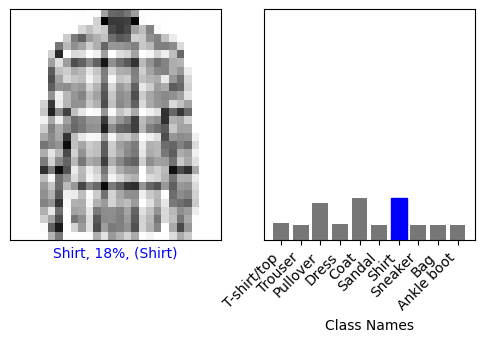

In [137]:
i=7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_probability(i, predictions[i], test_labels)
plt.show()

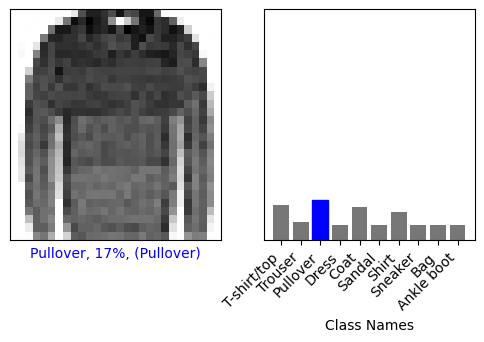

In [139]:
i=20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_probability(i, predictions[i], test_labels)
plt.show()

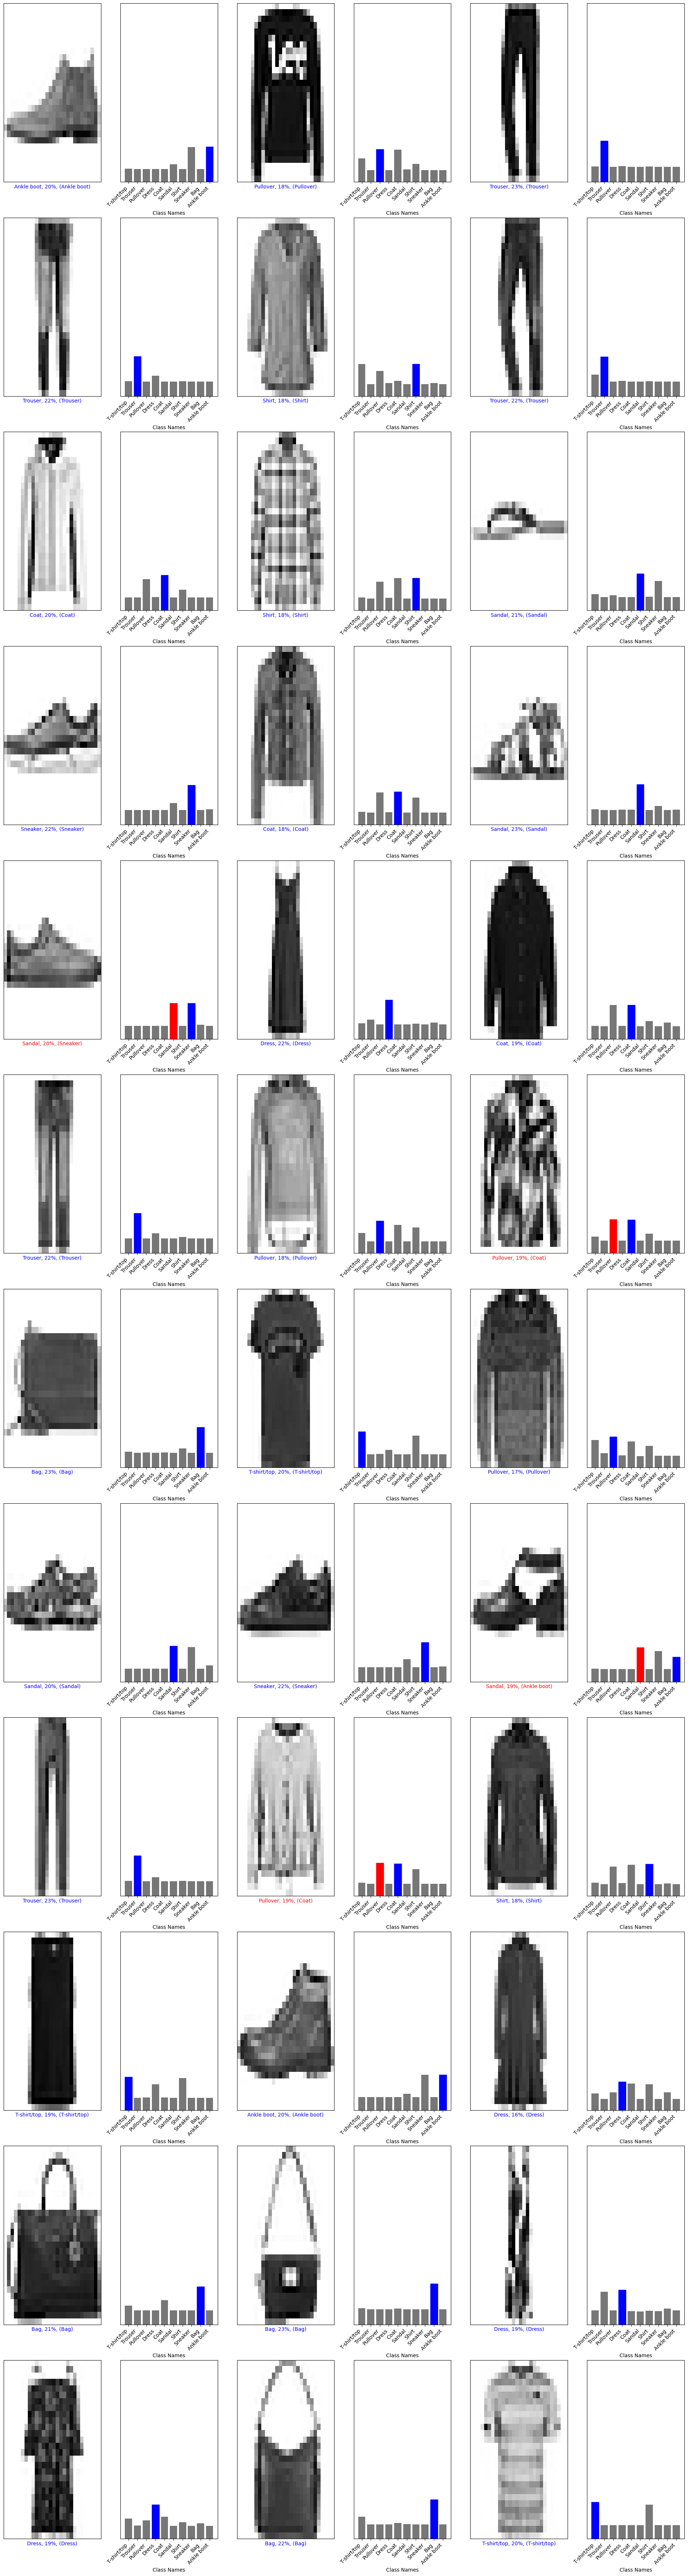

In [145]:
num_cols = 6
num_rows = 6
num_images = num_cols * num_rows
plt.figure(figsize=(4*num_cols, 15*num_rows))
for i in range(num_images):
    plt.subplot(2*num_cols, num_rows, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(2*num_cols, num_rows, 2*i+2)
    plot_probability(i, predictions[i], test_labels)
plt.tight_layout
plt.show()